In [1]:
import numpy as np
import pandas as pd
import json
import seaborn as sns

sns.set(style="whitegrid",
       rc={'figure.figsize':(16,8)})

In [2]:
sa = pd.read_csv('/Users/Vina/Downloads/caseStudy/SheetA.csv')
sb = pd.read_csv('/Users/Vina/Downloads/caseStudy/SheetB.csv')
sc = pd.read_csv('/Users/Vina/Downloads/caseStudy/SheetC.csv')

In [3]:
sa 

,grill_type,pre_heat_time,fuel_cost_per_meal,market_share,easiness_to_use,life_span_year,initial_investment
0,Charcoal,1200,2.00,0.44,-1,3,91
1,Propane,480,1.55,0.64,2,3,139


In [4]:
sb.head()

,item_material,device_id,grill_type,user_satisfaction,fuel_cost
0,Ground Beef Patty,1,Charcoal,-0.9,400.500
1,Ground Beef Patty,3,Charcoal,-1.3,399.600
2,Ground Beef Patty,5,Charcoal,-2.5,389.730
3,Ground Beef Patty,7,Charcoal,-1.7,402.399
4,Hotdog,1,Charcoal,-1.3,372.445


In [5]:
sc.head()

,sample_item_index,item_material,is_frozen,grill_type,thumbs_up_score,guess_grill_correct
0,1,Veggie Patty,False,Propane,0.0,True
1,1,Hotdog,False,Propane,0.4,True
2,2,Veggie Patty,True,Propane,0.9,True
3,3,Veggie Patty,False,Propane,0.8,True
4,4,Veggie Patty,True,Propane,0.8,True


**1. Name each sheet/table so they are meaningful standalone.**

In [7]:
grills = sa.copy()
grill_test = sb.copy()
grill_survey = sc.copy()

**2. Which grill type is more fuel efficient based on sheet A?**

In [10]:
grills[['grill_type','pre_heat_time']]

,grill_type,pre_heat_time
0,Charcoal,1200
1,Propane,480


**3. Which grill type has more market share?**

In [11]:
grills[['grill_type','market_share']]

,grill_type,market_share
0,Charcoal,0.44
1,Propane,0.64


**4. Based on the cookoff data which grill type cost more fuel on a long run?**

In [12]:
gt_df = grill_test.groupby(['grill_type', 'item_material']).mean()[['fuel_cost']]
gt_df.reset_index(inplace=True)

In [13]:
gt_df

,grill_type,item_material,fuel_cost
0,Charcoal,Ground Beef Patty,398.05725
1,Charcoal,Hotdog,369.22000
2,Charcoal,Veggie Patty,375.39300
3,Propane,Ground Beef Patty,171.69375
4,Propane,Hotdog,151.48750
5,Propane,Veggie Patty,151.14375


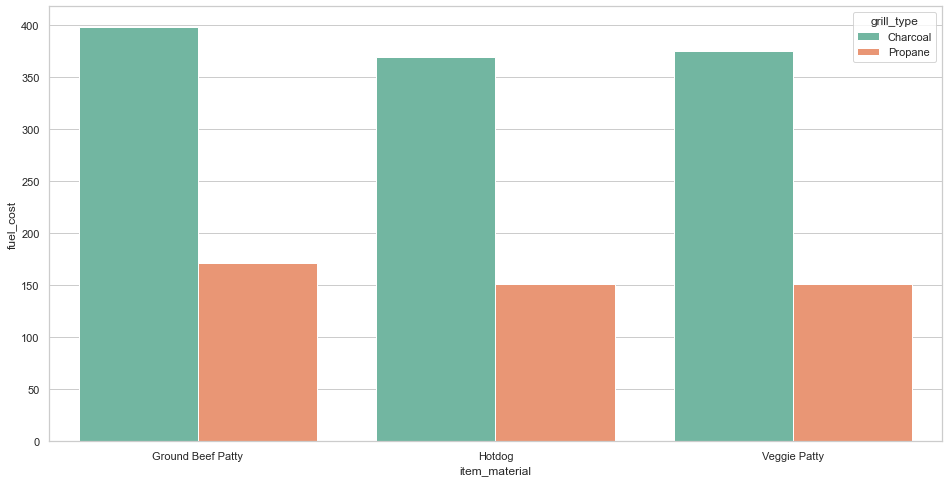

In [14]:
ax = sns.barplot(x='item_material', y='fuel_cost', hue='grill_type', data=gt_df, palette='Set2')

**5. Considering that the average American grill owner buys a new grill every three years, which grill type would cost more based on the fuel cost and initial investment?**

In [15]:
grills[['grill_type','fuel_cost_per_meal','initial_investment']]

,grill_type,fuel_cost_per_meal,initial_investment
0,Charcoal,2.00,91
1,Propane,1.55,139


In [16]:
#uses_per_summer = 16
grill_cost = pd.DataFrame({'grill_type':['Charcoal','Propane'],
                           'total_cost_per_three_years':[2*16+91, 1.55*16+139]})
grill_cost

,grill_type,total_cost_per_three_years
0,Charcoal,123.0
1,Propane,163.8


**6. Which grill type is easier to use based on the user satisfaction score? Based on data, which grill is preferred? What factors might play a role?**

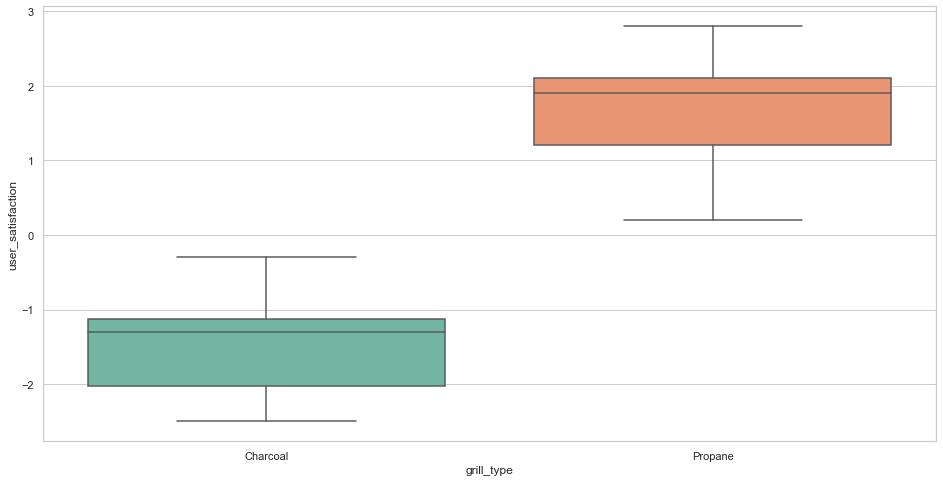

In [17]:
ax = sns.boxplot(x='grill_type', y='user_satisfaction', data=grill_test, palette='Set2')

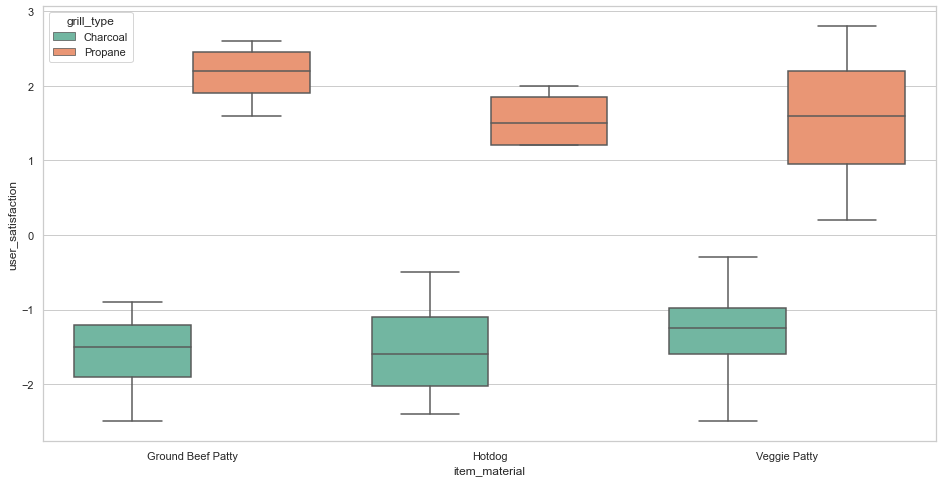

In [18]:
ax = sns.boxplot(x='item_material', y='user_satisfaction', data=grill_test, hue = 'grill_type', palette='Set2')

**7. Please generate an aggregated dataset to present your conclusions.**

In [20]:
df_1 = grills[['grill_type', 'market_share',]]
df_2 = grill_test.groupby(['grill_type', 'item_material']).mean()[['user_satisfaction','fuel_cost']]
df_3 = grill_survey.groupby(['grill_type', 'item_material'])\
       .mean()[['thumbs_up_score']]

In [21]:
grill_agg = df_2.join(df_3)
grill_agg = grill_agg.join(df_1.set_index(['grill_type']))
grill_agg = grill_agg.join(grill_cost.set_index(['grill_type']))

In [22]:
grill_agg.columns

Index(['user_satisfaction', 'fuel_cost', 'thumbs_up_score', 'market_share',
       'total_cost_per_three_years'],
      dtype='object')

In [23]:
grill_agg.rename(columns={'user_satisfaction':'user_satisfaction(AVE)','fuel_cost':'fuel_cost(AVE)',
                          'thumbs_up_score':'thumbs_up_score(AVE)',
                          'total_cost_per_three_years':'total_cost(/3 years)'},inplace=True)

In [24]:
grill_agg = grill_agg[['market_share','total_cost(/3 years)','fuel_cost(AVE)',
                       'user_satisfaction(AVE)','thumbs_up_score(AVE)']]

grill_agg

market_share  total_cost(/3 years)  \
grill_type item_material                                           
Charcoal   Ground Beef Patty          0.44                 123.0   
           Hotdog                     0.44                 123.0   
           Veggie Patty               0.44                 123.0   
Propane    Ground Beef Patty          0.64                 163.8   
           Hotdog                     0.64                 163.8   
           Veggie Patty               0.64                 163.8   

                              fuel_cost(AVE)  user_satisfaction(AVE)  \
grill_type item_material                                               
Charcoal   Ground Beef Patty       398.05725                  -1.600   
           Hotdog                  369.22000                  -1.525   
           Veggie Patty            375.39300                  -1.325   
Propane    Ground Beef Patty       171.69375                   2.150   
           Hotdog                  151.48750                   1.550   
           Veggie Patty            151.14375                   1.550   

                              thumbs_up_score(AVE)  
grill_type item_material                            
Charcoal   Ground Beef Patty              0.179167  
           Hotdog                         5.194167  
           Veggie Patty                   0.160833  
Propane    Ground Beef Patty              5.586667  
           Hotdog                         0.549167  
           Veggie Patty                   0.538333

**8. Are your recommendations to the manufacturer different to recommendations you’d make to the user?**

obeserve the guess rate.

In [25]:
correct_rate = grill_survey.groupby(['item_material', 'grill_type','guess_grill_correct']).count()[['is_frozen']]
correct_rate.rename(columns={'is_frozen':'count'},inplace=True)

In [26]:
correct_rate['rate']= correct_rate['count'].apply(lambda x: round(x/120,2))

In [27]:
correct_rate

count  rate
item_material     grill_type guess_grill_correct             
Ground Beef Patty Charcoal   False                   18  0.15
                             True                   102  0.85
                  Propane    False                    4  0.03
                             True                   116  0.97
Hotdog            Charcoal   False                    7  0.06
                             True                   113  0.94
                  Propane    False                   21  0.17
                             True                    99  0.82
Veggie Patty      Charcoal   False                   13  0.11
                             True                   107  0.89
                  Propane    False                   14  0.12
                             True                   106  0.88

user scores for different type of grills.

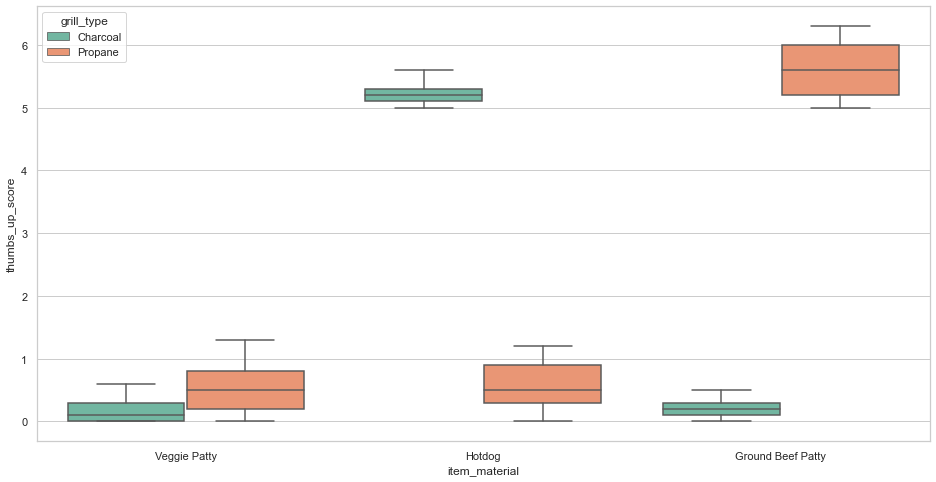

In [28]:
ax = sns.boxplot(x='item_material',y = 'thumbs_up_score', data=grill_survey, 
                 hue='grill_type', hue_order=['Charcoal','Propane'],palette='Set2')

**9. (Bonus) Transform SheetC.json to SheetC.csv**

In [29]:
with open('/Users/Vina/Downloads/caseStudy/SheetC.json','r') as f:
    file_data = json.load(f)
    
dict_data = eval(file_data[0]['test_result'])

In [30]:
sample_item_index=[]
item_material=[]
is_frozen=[]
grill_type=[]
thumbs_up_score=[]
guess_grill_correct=[]

In [31]:
count = 1
while count<=720:
    item = dict_data[str(count)]
    
    grill_type.append(item['meta_data']['grill_type'])
    is_frozen.append(item['meta_data']['is_frozen'].capitalize())
    item_material.append(item['meta_data']['item_material'])
    
    sample_item_index.append(item['sample_item_index'])
    
    guess_grill_correct.append(item['survey_result']['guess_grill_correct'].capitalize())
    thumbs_up_score.append(float(item['survey_result']['thumbs_up_score']))
    
    count+=1
    

In [32]:
grill_survey_1 = pd.DataFrame({'sample_item_index':sample_item_index,
                               'item_material':item_material,
                               'is_frozen':is_frozen,
                               'grill_type':grill_type,
                               'thumbs_up_score':thumbs_up_score,
                               'guess_grill_correct':guess_grill_correct}) 

grill_survey_1.head(10)

,sample_item_index,item_material,is_frozen,grill_type,thumbs_up_score,guess_grill_correct
0,1,Hotdog,False,Propane,0.4,True
1,2,Hotdog,True,Propane,0.8,True
2,3,Hotdog,False,Propane,0.6,True
3,4,Hotdog,True,Propane,0.0,False
4,5,Hotdog,False,Propane,0.2,False
5,6,Hotdog,True,Propane,0.4,True
6,7,Hotdog,False,Propane,0.3,True
7,8,Hotdog,True,Propane,0.8,True
8,9,Hotdog,False,Propane,0.7,False
9,10,Hotdog,True,Propane,1.0,True


verify the dataset.

In [33]:
grill_survey_1[(grill_survey_1['item_material']=='Veggie Patty') & (grill_survey_1['sample_item_index']==1)]

,sample_item_index,item_material,is_frozen,grill_type,thumbs_up_score,guess_grill_correct
240,1,Veggie Patty,False,Propane,0.0,True
270,1,Veggie Patty,False,Propane,0.8,True
300,1,Veggie Patty,False,Propane,0.3,True
330,1,Veggie Patty,False,Propane,1.1,True
360,1,Veggie Patty,False,Charcoal,0.3,True
390,1,Veggie Patty,False,Charcoal,0.4,True
420,1,Veggie Patty,False,Charcoal,0.1,True
450,1,Veggie Patty,False,Charcoal,0.2,True


In [34]:
grill_survey[(grill_survey['item_material']=='Veggie Patty') & (grill_survey['sample_item_index']==1)]

,sample_item_index,item_material,is_frozen,grill_type,thumbs_up_score,guess_grill_correct
0,1,Veggie Patty,False,Propane,0.0,True
43,1,Veggie Patty,False,Propane,1.1,True
73,1,Veggie Patty,False,Charcoal,0.3,True
109,1,Veggie Patty,False,Propane,0.3,True
127,1,Veggie Patty,False,Propane,0.8,True
153,1,Veggie Patty,False,Charcoal,0.4,True
183,1,Veggie Patty,False,Charcoal,0.1,True
213,1,Veggie Patty,False,Charcoal,0.2,True
